In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
data = pd.read_csv("bank.csv")

In [ ]:
data.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.shape

(11162, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# To check if there is any missing value in the dataset 
data.isnull().sum().sum()

0

In [ ]:
# To fetch the data set with categorical columns 
data1 = data.select_dtypes(include = 'object')

In [ ]:
data1.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
data1.shape
data1.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


In [ ]:
# Analysisng the job column of the dataset 
data1['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
# to count in every job such that deposit is yes 
cat_job = list(data1['job'].unique())


In [ ]:
for i in cat_job :
  job_dep = data1[(data1['job'] == i) & (data1['deposit'] == 'yes')]
  # print(f"{i}  =  {len(job_dep)}")
  print("{:15} : {:5}". format(i,len(job_dep)))

admin.          :   631
technician      :   840
services        :   369
management      :  1301
retired         :   516
blue-collar     :   708
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34
self-employed   :   187
student         :   269


In [ ]:
# different categories of jobs and their count
data1.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
# Recategorising different categories of the job column 
data['job'] = data['job'].replace(['management', 'admin.'], 'white-collar')
data['job'] = data['job'].replace(['services','housemaid'], 'pink-collar')
data['job'] = data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [ ]:
data1.marital.value_counts()


married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
# Replace yes as 1 and no as 0 in the deposit column of the dataset 
data1['deposit'] = data1['deposit'].replace({'yes':1,'no':0})

<ipython-input-96-a0bfe7f51327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['deposit'] = data1['deposit'].replace({'yes':1,'no':0})


In [ ]:
data1

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,1
1,admin.,married,secondary,no,no,no,unknown,may,unknown,1
2,technician,married,secondary,no,yes,no,unknown,may,unknown,1
3,services,married,secondary,no,yes,no,unknown,may,unknown,1
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,1
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,0
11158,services,married,secondary,no,no,no,unknown,jun,unknown,0
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,0
11160,technician,married,secondary,no,no,yes,cellular,may,failure,0


In [ ]:
# to get the number of people who are taking deposits and their marital status 

print(f"{data1[['marital','deposit']].groupby(['marital']).mean()}\n\n\nPercentage \n\n{data1[['marital','deposit']].groupby(['marital']).sum()/data1.shape[0]}")
# data1[['marital','deposit']].groupby(['marital']).count()
# data1[['marital','deposit']].groupby(['marital']).sum()

           deposit
marital           
divorced  0.481052
married   0.433790
single    0.543491


Percentage 

           deposit
marital           
divorced  0.055725
married   0.246820
single    0.171295


In [ ]:
# relation between job and deposit 
print(f"{data1[['job','deposit']].groupby(['job']).mean()},\n\npercentage: \n\n {data1[['job','deposit']].groupby(['job']).sum()/data1.shape[0]}")

                deposit
job                    
admin.         0.473013
blue-collar    0.364198
entrepreneur   0.375000
housemaid      0.397810
management     0.507015
retired        0.663239
self-employed  0.461728
services       0.399783
student        0.747222
technician     0.460779
unemployed     0.565826
unknown        0.485714,

percentage: 

                 deposit
job                    
admin.         0.056531
blue-collar    0.063429
entrepreneur   0.011020
housemaid      0.009765
management     0.116556
retired        0.046228
self-employed  0.016753
services       0.033059
student        0.024100
technician     0.075255
unemployed     0.018097
unknown        0.003046


In [ ]:
# POUTCOME
data1.poutcome = data1.poutcome.str.replace('other','unknown')
print(f"{data1[['poutcome','deposit']].groupby(['poutcome']).mean()} \n\n\n {data1[['poutcome','deposit']].groupby(['poutcome']).sum()/data1.shape[0]}")

           deposit
poutcome          
failure   0.503257
success   0.913165
unknown   0.416676 


            deposit
poutcome          
failure   0.055366
success   0.087619
unknown   0.330855


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.poutcome = data.poutcome.str.replace('other','unknown')

In [ ]:
# contact column to be dropped as all the customers were contacted
data.drop('contact',axis=1,inplace = True )

In [ ]:
# default and deposit relationship 
data['default'] = data['default'].replace({'yes':1,'no':0})

print(f"{data1[['default','deposit']].groupby(['default']).sum()/data1.shape[0]} \n\n\n Percentage\n\n {data1[['default','deposit']].groupby(['default']).mean()}")


          deposit
default          
no       0.469181
yes      0.004659 


 Percentage

           deposit
default          
no       0.476351
yes      0.309524


In [ ]:
# housing and Personal loan 
data1[['housing','loan','deposit']].groupby(['housing','loan']).sum()/data1.shape[0]

deposit
housing loan          
no      no    0.280864
        yes   0.019620
yes     no    0.149615
        yes   0.023741

In [ ]:
# To get the datset with continuous features 
data2 = data.select_dtypes(include ='int')
data2

,age,default,balance,day,duration,campaign,pdays,previous
0,59,0,2343,5,1042,1,-1,0
1,56,0,45,5,1467,1,-1,0
2,41,0,1270,5,1389,1,-1,0
3,55,0,2476,5,579,1,-1,0
4,54,0,184,5,673,2,-1,0
...,...,...,...,...,...,...,...,...
11157,33,0,1,20,257,1,-1,0
11158,39,0,733,16,83,4,-1,0
11159,32,0,29,19,156,2,-1,0
11160,43,0,0,8,9,2,172,5


In [ ]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning

data.drop('day',axis = 1,inplace = True )

In [ ]:
# To check if there is any relationship between month and deposition in the bank 
q = data1[['month','deposit']].groupby(['month']).sum()/data1.shape[0]
q.sort_values('deposit',ascending=False)

,deposit
month,
may,0.082870
aug,0.061638
jul,0.056173
apr,0.051693
jun,0.048916
feb,0.039509
nov,0.036105
oct,0.028937
sep,0.024100


In [ ]:
# we can drop month column since it does not have intrinsic value into the dataset 
data.drop('month',axis = 1,inplace = True )


In [ ]:
data.shape

(11162, 14)

In [ ]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# -1 means client was not previously contacted
print("{:15} :{:3}".format("No. of people not contacted",data2[data2['pdays']== -1].shape[0]))
print("{:15} : {:5}". format("Max number of days without contact",data2['pdays'].max()))


No. of people not contacted :8324
Max number of days without contact :   854


In [ ]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
data.loc[data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Adding additional columns as recent days and removing pdays for the dataset 
data['recent_pdays'] = np.where(data['pdays'], 1/data.pdays, 1/data.pdays)
data['recent_pdays'].max()
data.drop('pdays',axis=1,inplace = True)


In [ ]:
data['deposit'] = data['deposit'].replace({'yes':1,'no':0})

In [ ]:
data.shape

(11162, 14)

In [ ]:
# This is a balanced data 
data['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# Observation 
- most of the people who has the deposits are belonging to the white collar job 
- most of the deposit holders are married 
- if category wise people are targetted success rate is highest among the singles and in the job category are the "other" category.
- The success category of the poutcome is more likely to buy take the deposit 
- Since all the people were contacted so we can drop the contact column 
- Most of the people who have defaulted are going to for the deposit 
- Those people who niether have housing loan or personal loan are more likely to say yes to deposit 
- Day does not have intrinsic importance 
- Month doesnot have any pattern we can drop the month columns 

In [ ]:
#to fetch the categorical features
data.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'poutcome'], dtype='object')

In [ ]:
 # Convert the categorical features into numerical 
col = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
df = pd.get_dummies(data,columns = col,drop_first=True)

In [ ]:
df.head()

,age,default,balance,duration,campaign,previous,deposit,recent_pdays,job_entrepreneur,job_other,...,job_white-collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,poutcome_success,poutcome_unknown
0,59,0,2343,1042,1,0,1,0.0001,0,0,...,1,1,0,1,0,0,1,0,0,1
1,56,0,45,1467,1,0,1,0.0001,0,0,...,1,1,0,1,0,0,0,0,0,1
2,41,0,1270,1389,1,0,1,0.0001,0,0,...,0,1,0,1,0,0,1,0,0,1
3,55,0,2476,579,1,0,1,0.0001,0,0,...,0,1,0,1,0,0,1,0,0,1
4,54,0,184,673,2,0,1,0.0001,0,0,...,1,1,0,0,1,0,0,0,0,1


In [ ]:
# To get shape of the dummy dataset 
df.shape

(11162, 23)

In [ ]:
df.describe()

,age,default,balance,duration,campaign,previous,deposit,recent_pdays,job_entrepreneur,job_other,...,job_white-collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,371.993818,2.508421,0.832557,0.473840,0.003124,0.029385,0.140208,...,0.349400,0.568984,0.315176,0.490593,0.330496,0.044526,0.473123,0.130801,0.095951,0.794033
std,11.913369,0.121761,3225.413326,347.128386,2.722077,2.292007,0.499338,0.030686,0.168892,0.347218,...,0.476802,0.495241,0.464607,0.499934,0.470413,0.206270,0.499299,0.337198,0.294537,0.404424
min,18.000000,0.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1708.000000,496.000000,3.000000,1.000000,1.000000,0.001919,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


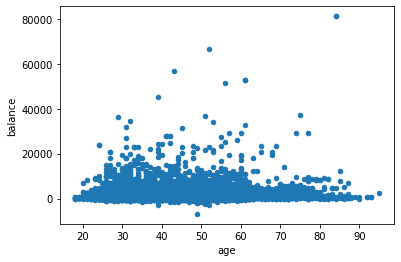

In [ ]:
df.plot(kind='scatter',x='age',y='balance')

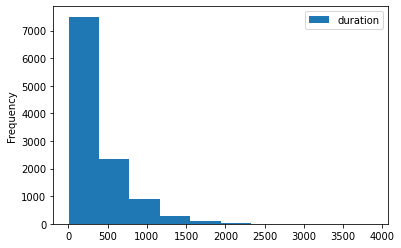

In [ ]:
df.plot(kind='hist',x='poutcome_success',y='duration')

### Analysis of the people with bank deposits

In [ ]:
# description of the people with bank deposit 
df[df.deposit==1].describe()

,age,default,balance,duration,campaign,previous,deposit,recent_pdays,job_entrepreneur,job_other,...,job_white-collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,0.009832,1804.267915,537.294574,2.141047,1.170354,1.0,0.004238,0.023256,0.193042,...,0.365286,0.520892,0.361505,0.463226,0.377387,0.047646,0.365854,0.091511,0.184912,0.698242
std,13.497781,0.098676,3501.104777,392.525262,1.921826,2.553272,0.0,0.035686,0.150729,0.394723,...,0.481556,0.499611,0.480482,0.498693,0.484779,0.213036,0.481714,0.288361,0.388263,0.459064
min,18.000000,0.000000,-3058.000000,8.000000,1.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,210.000000,244.000000,1.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,733.000000,426.000000,2.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,0.000000,2159.000000,725.000000,3.000000,1.000000,1.0,0.005128,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,3881.000000,32.000000,58.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(df[(df.deposit==1) & (df.housing_yes == 1) & (df.loan_yes==1)])

265

In [ ]:
# People signed up to a term deposite with a credit default
len(df[(df.deposit==1) & (df.default == 1)])

52

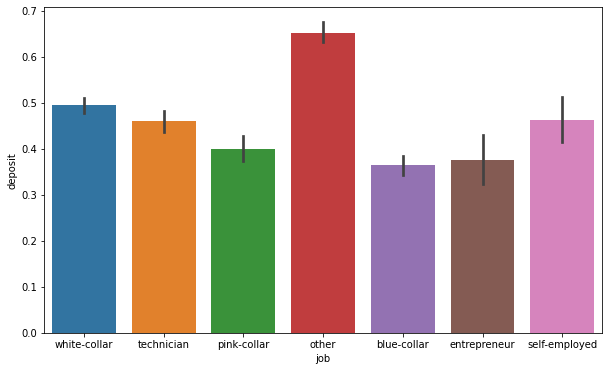

In [ ]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit', data = data)

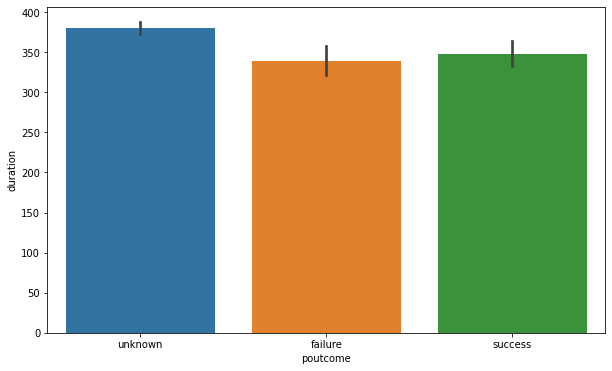

In [ ]:
# Bar chart of "previous outcome" Vs "call duration"
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = data)

In [ ]:
# Classification 
corr = df.corr()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

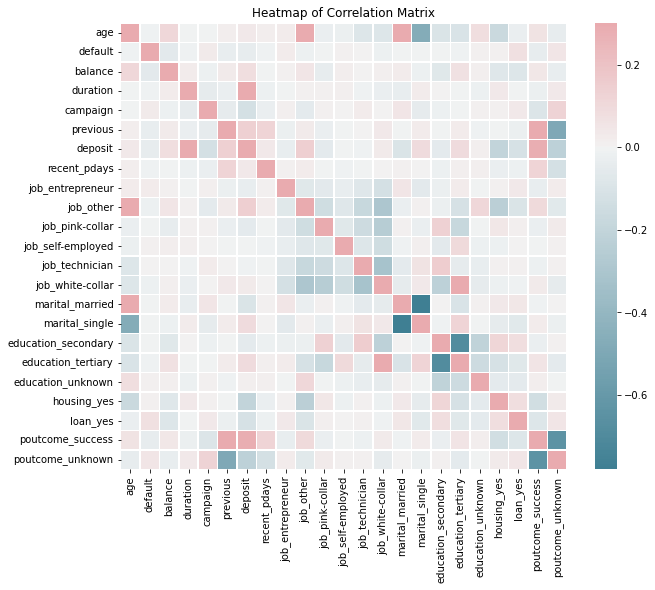

In [ ]:
# Heatmap 
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [ ]:
# To have a look at the correlation of various independent feature on the deposits in descending order 
corr_dep = pd.DataFrame(corr['deposit'].drop('deposit'))

In [ ]:
corr_dep.sort_values('deposit',ascending = False)

,deposit
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


### Building Data Model

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 


In [ ]:
## Accuracy is defined as: fraction of correct predictions): correct predictions / total number of data points
# Hence we use score 

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2,random_state = 1)
clf.fit(X_train,y_train)
score_2 = clf.score(X_train,y_train)
test_score_2 = clf.score(X_train,y_train)
print(f"Train Score : {score_2}")
print(f"Test Score :{test_score_2}")

Train Score : 0.9512823384477546
Test Score :0.9512823384477546


In [ ]:
clf3 = DecisionTreeClassifier(max_depth = 3,random_state=1)
clf3.fit(X_train,y_train)
score3=clf3.score(X_train,y_train)
test_score3 = clf3.score(X_test,y_test)
print(f"Train Score : {score3}")
print(f"Test Score :{test_score3}")

Train Score : 0.9521782954418188
Test Score :0.9529780564263323


### Tuning the Depth of a Tree

In [ ]:
# List of values to try for max_depth 
max_depth_range = list(range(1,6))
# list to store the sccuracy 
accuracy =  {}
for depth in max_depth_range:
  clf = DecisionTreeClassifier(max_depth = depth , random_state = 0 )
  clf.fit(X_train,y_train)
  score = clf.score(X_test,y_test)
  accuracy[depth] = score
print(accuracy)   

{1: 0.9534258844603672, 2: 0.9534258844603672, 3: 0.9529780564263323, 4: 0.9520824003582624, 5: 0.9502910882221227}


In [ ]:
l = list(accuracy.keys())
m = list(accuracy.values())

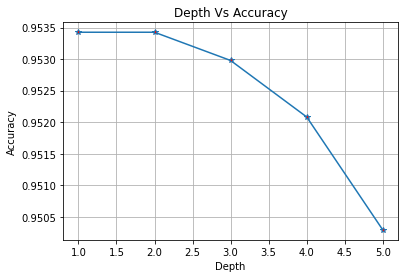

In [ ]:

plt.plot(l,m,marker ='*',markerfacecolor='red')
plt.title("Depth Vs Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### So our tuning of decision Trees shows that the max depth as 1 or 2  is showing the best accuracy 


#####  Classification trees calculates feature importance which is the total amount that gini index or entropy decrease due to splits over a given feature. Scikit-learn outputs a number between 0 and 1 for each feature. All feature importances are normalized to sum to 1.

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
5,previous,0.950
21,poutcome_success,0.043
7,recent_pdays,0.003
0,age,0.003
4,campaign,0.002
3,duration,0.000
20,loan_yes,0.000
19,housing_yes,0.000
18,education_unknown,0.000
17,education_tertiary,0.000


In [ ]:
# Accoring to our model the most important feature is "Previous"
# Lets calculate statistics on "Previous"
print(df['previous'].describe())

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64
